# Love waves in anisotropic layered media

In [1]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times"
plt.rcParams.update({'font.size': 30})
plt.rcParams['xtick.major.pad']='12'
plt.rcParams['ytick.major.pad']='12'

# 1. General background

The following is a notebook for the calculation of surface wave dispersion and sensitivity kernels for surface waves propagating in layered media. The developments closely follow the classical work of Takeuchi & Saito (1972) ["Seismic Surface Waves", Methods in Computational Physics: Advances in Research and Applications, 217 - 295]. For this, we consider elastic media with vertical symmetry axis, where the stress-strain relation is given by

\begin{equation}
\sigma_{xx} = A (\epsilon_{xx} + \epsilon_{yy}) - 2N \epsilon_{yy} + F \epsilon_{zz}\,, \\
\sigma_{yy} = A (\epsilon_{xx} + \epsilon_{yy}) - 2N \epsilon_{xx} + F \epsilon_{zz}\,, \\
\sigma_{zz} = F (\epsilon_{xx} + \epsilon_{yy}) + C \epsilon_{zz}\,, \\
\sigma_{yz} = 2 L (\epsilon_{yz}\,, \\
\sigma_{zx} = 2 L (\epsilon_{zx})\,, \\
\sigma_{xy} = 2N \epsilon_{xy}\,,
\end{equation}

with the strain tensor components

\begin{equation}
\epsilon_{ij} = \frac{1}{2} ( \partial_i u_j + \partial_j u_i )\,.
\end{equation}

The $z$-axis is defined positive upwards, medium parameters are assumed to depend only on $z$, and all waves propagate in $x$-direction. We will generally consider freely propagating waves, meaning that no sources are active. For this case, the equations of motion in the frequency domain are

\begin{equation}
-\omega^2 \rho u_i - \partial_j \sigma_{ij} = 0\,. 
\end{equation}

# 2. Phase and group velocity dispersion curves

## 2.1. Love waves

Love waves are SH-waves, and so we seek solutions to the equations of motion in the form

\begin{equation}
u_x = u_z = 0\,,\\
u_y = y_1(z; \omega, k) \, e^{i(\omega t - kx)}\,.
\end{equation}

Inserting this ansatz into the stress-strain relation and the equations of motion, yields a system of two ordinary differential equations,

\begin{equation}
\partial_z y_2 = (k^2 N - \omega^2 \rho) y_1\,,\\
\partial_z y_1 = y_2/L\,.
\end{equation}

These equations have the useful advantage that they do not contain derivatives of the material parameters, and that they are written in terms of continuous displacement ($y_1$) and stress ($y_2$) quantities. These have to satisfy the boundary conditions

\begin{equation}
y_1 \text{ and } y_2 \text{ are continuous}\,,\\
y_2 = 0 \text{ at the surface}\,,\\
y_1,y_2 \to 0 \text{ as } z\to -\infty\,.
\end{equation}

## 2.2. Analytical solution for layer over a half-space

For a homogeneous, isotropic layer ($0<z\leq H$, with medium properties $L_1=N_1=\mu_1$, $\rho_1$) over a homogeneous, isotropic half-space ($z<0$, with medium properties $L_2=N_2=\mu_2$, $\rho_2$) the Love wave equations can be solved analytically. In the upper layer, we find

\begin{equation}
y_1(z) = A \cos(\nu_1 z) + \frac{\mu_2\nu_2}{\mu_2\nu_1} A \sin(\nu_1 z)\,,\\
y_2(z) = -A \mu_1\nu_1 \sin(\nu_1 z) + A \mu_2 \nu_2 \cos(\nu_1 z)\,,
\end{equation}

and in the half-space we have

\begin{equation}
y_1(z) = A e^{\nu_2 z}\,\\
y_2(z) = \mu_2\nu_2 A e^{\nu_2 z}\,,
\end{equation}

with some arbitrary amplitude $A$. The positive scalars $\nu_1$ and $\nu_2$ are defined as

\begin{equation}
\nu_1^2 = \frac{\rho_1\omega^2}{\mu_1} - k^2 > 0\,,\\
\nu_2^2 = k^2 - \frac{\rho_2\omega^2}{\mu_2} > 0\,.
\end{equation}

It follows immediately from the last two relations that a Love wave can only exist in the presence of a low-velocity layer, that is, when

\begin{equation}
\frac{\mu_1}{\rho_1} = \beta_1^2 < \frac{\omega^2}{k^2} < \beta_2^2 = \frac{\mu_2}{\rho_2}\,.
\end{equation}

Hence, the phase velocity $\omega/k$ of a Love wave is between the phase velocities of the layer (slower) and the half-space (faster). For a given frequency $\omega$, the wave number $k$ is so far undetermined. It follows, however, from the free-surface boundary condition, which yields the characteristic equation of Love waves:

\begin{equation}
\mu_2\nu_2\,\cos(\nu_1 H) = \mu_1\nu_1\,\sin(\nu_1 H)\,.
\end{equation}

### 2.2.1. Medium properties

First, we define some medium properties and plot the characteristic function.

In [2]:
# velocity [m/s] and density [kg/m^3] of the layer
beta_1=2000.0
rho_1=2700.0

# velocity [m/s] and density [kg/m^3] of the half-space
beta_2=3000.0
rho_2=3100.0

# thickness of the layer [m]
H=10000.0

# frequency [Hz]
f=1.0

In [3]:
# shear moduli
mu_1=(beta_1**2)*rho_1
mu_2=(beta_2**2)*rho_2

# circular frequency
omega=2.0*np.pi*f

### 2.2.2. Characteristic function

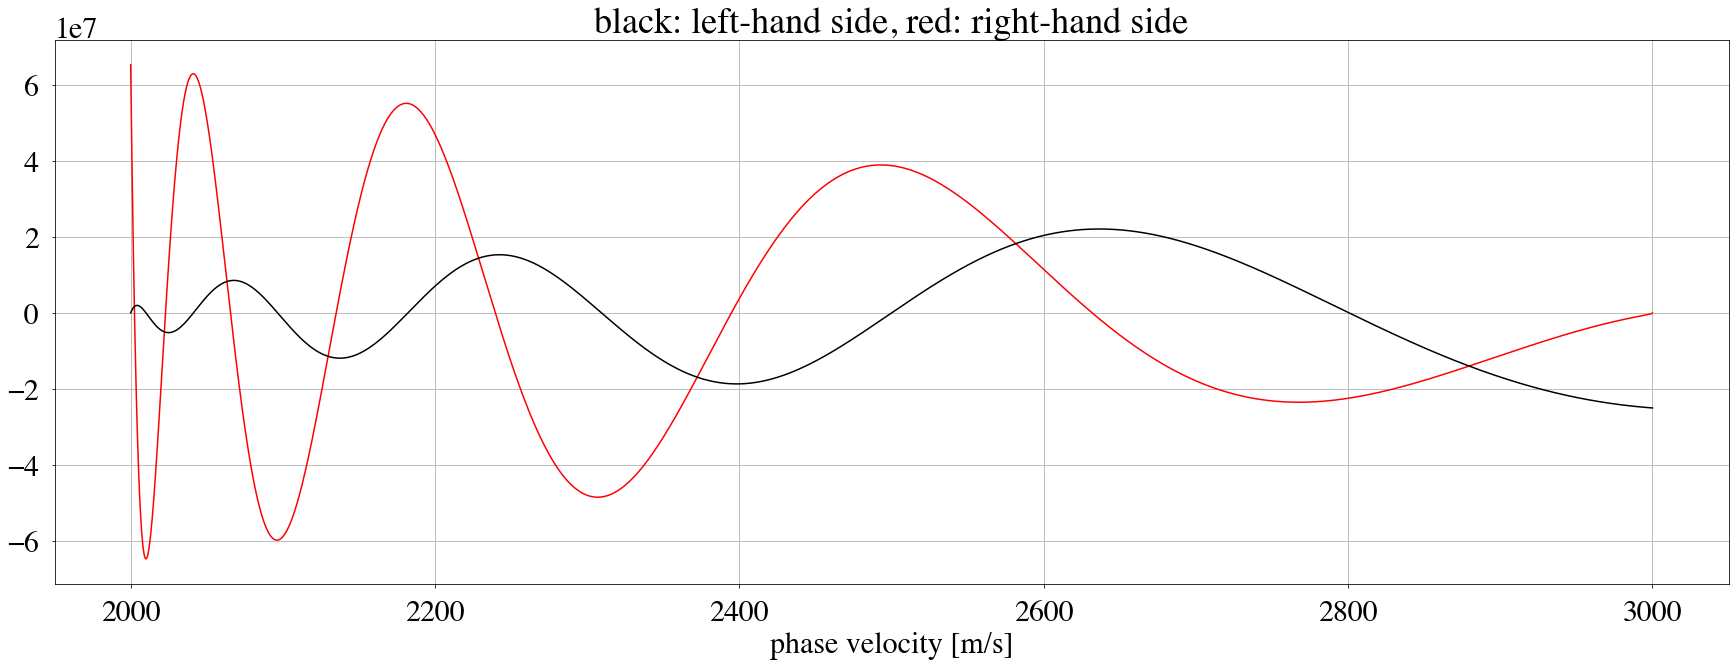

In [4]:
# march through phase velocities and plot left- versus right-hand side of the characteristic equation
eps=1.0e-9
beta=np.linspace(beta_1+eps,beta_2-eps,10000)
k=omega/beta

nu_1=np.sqrt(rho_1*omega**2/mu_1 - k**2)
nu_2=np.sqrt(k**2 - rho_2*omega**2/mu_2)

plt.subplots(1,figsize=(30,10))
plt.plot(beta,(mu_2*nu_2)*np.cos(nu_1*H),'r')
plt.plot(beta,(mu_1*nu_1)*np.sin(nu_1*H),'k')
plt.grid()
plt.xlabel('phase velocity [m/s]')
plt.title('black: left-hand side, red: right-hand side')
plt.show()

Obviously, the characteristic equation can have more than one solution, depending on the frequency. In general, the number of solutions increases with increasing frequency.

### 2.2.3. Dispersion curves

As a next step, we will march through frequency $f$ and determine the wave numbers $k$ (or, equivalently, phase velocities $\beta$) that solve the characteristic equation. Each solution is referred to as a mode. The mode with the lowest frequency is the fundamental mode. All others are higher modes or overtones.

To make the solution of the characteristic equation easier, we define it as a separate function:

In [5]:
def cf(omega,beta):
    
    k=omega/beta
    nu_1=np.sqrt(rho_1*omega**2/mu_1 - k**2)
    nu_2=np.sqrt(k**2 - rho_2*omega**2/mu_2)
    
    return (mu_2*nu_2)*np.cos(nu_1*H)- (mu_1*nu_1)*np.sin(nu_1*H)

Then we define some input parameters; the frequency range of interest, and the maximum number of modes we wish to find. Approximate solutions are then found by bisection. To find these solutions with reasonable accuracy and to avoid missing modes, the frequency increment $df$ needs to be sufficiently small.

In [6]:
# frequency range [Hz]
f_min=0.1
f_max=1.0
df=0.01

# maximum number of higher modes
n=10

Then we march through the discrete frequency intervals.

In [7]:
# test phase velocities [m/s]
b=np.linspace(beta_1+eps,beta_2-eps,1000)

# march through frequency-phase velocity pairs
f=np.arange(f_min,f_max+df,df)
beta=np.zeros((len(f),10))

for i in range(len(f)):
    
    omega=2.0*np.pi*f[i]
    count=0
    
    for j in range(len(b)-1):
        
        if (cf(omega,b[j])*cf(omega,b[j+1])<0.0):
            beta[i,count]=0.5*(b[j]+b[j+1])
            count+=1

Finally, we plot the results.

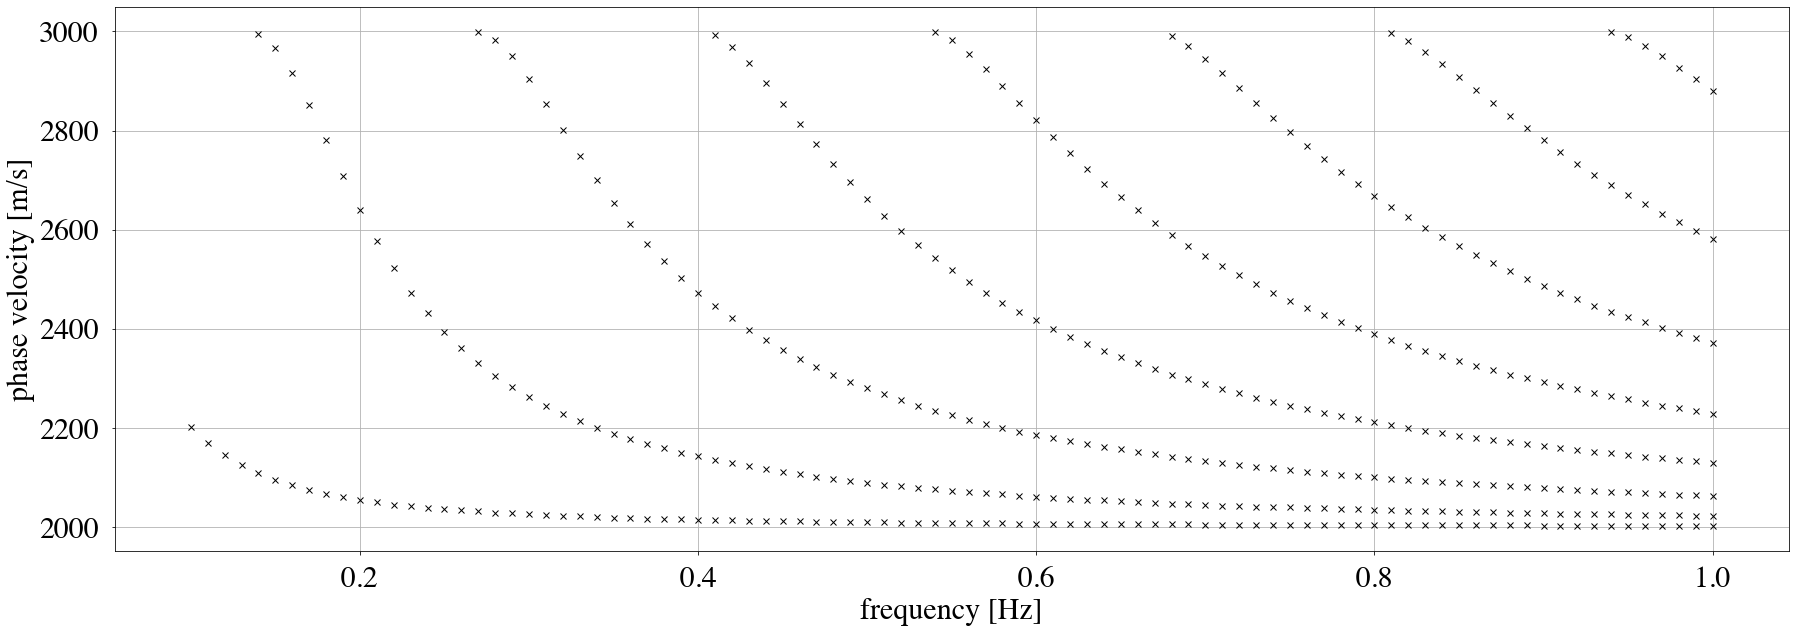

In [8]:
plt.subplots(1,figsize=(30,10))
for i in range(len(f)):
    for j in range(n):
        if beta[i,j]>0.0: plt.plot(f[i],beta[i,j],'kx')
            
plt.xlabel('frequency [Hz]')
plt.ylabel('phase velocity [m/s]')
plt.grid()
plt.show()

### 2.2.4. Displacement and stress function

Based on the computed dispersion curves, we can plot the displacement function $y_1$ and the stress function $y_2$ as a function of depth.

In [9]:
# frequency index
i=60
# mode index
j=3

print('frequency=%f Hz, mode=%d, phase velocity=%f m/s' % (f[i],j,beta[i,j]))

frequency=0.700000 Hz, mode=3, phase velocity=2287.787788 m/s


[]

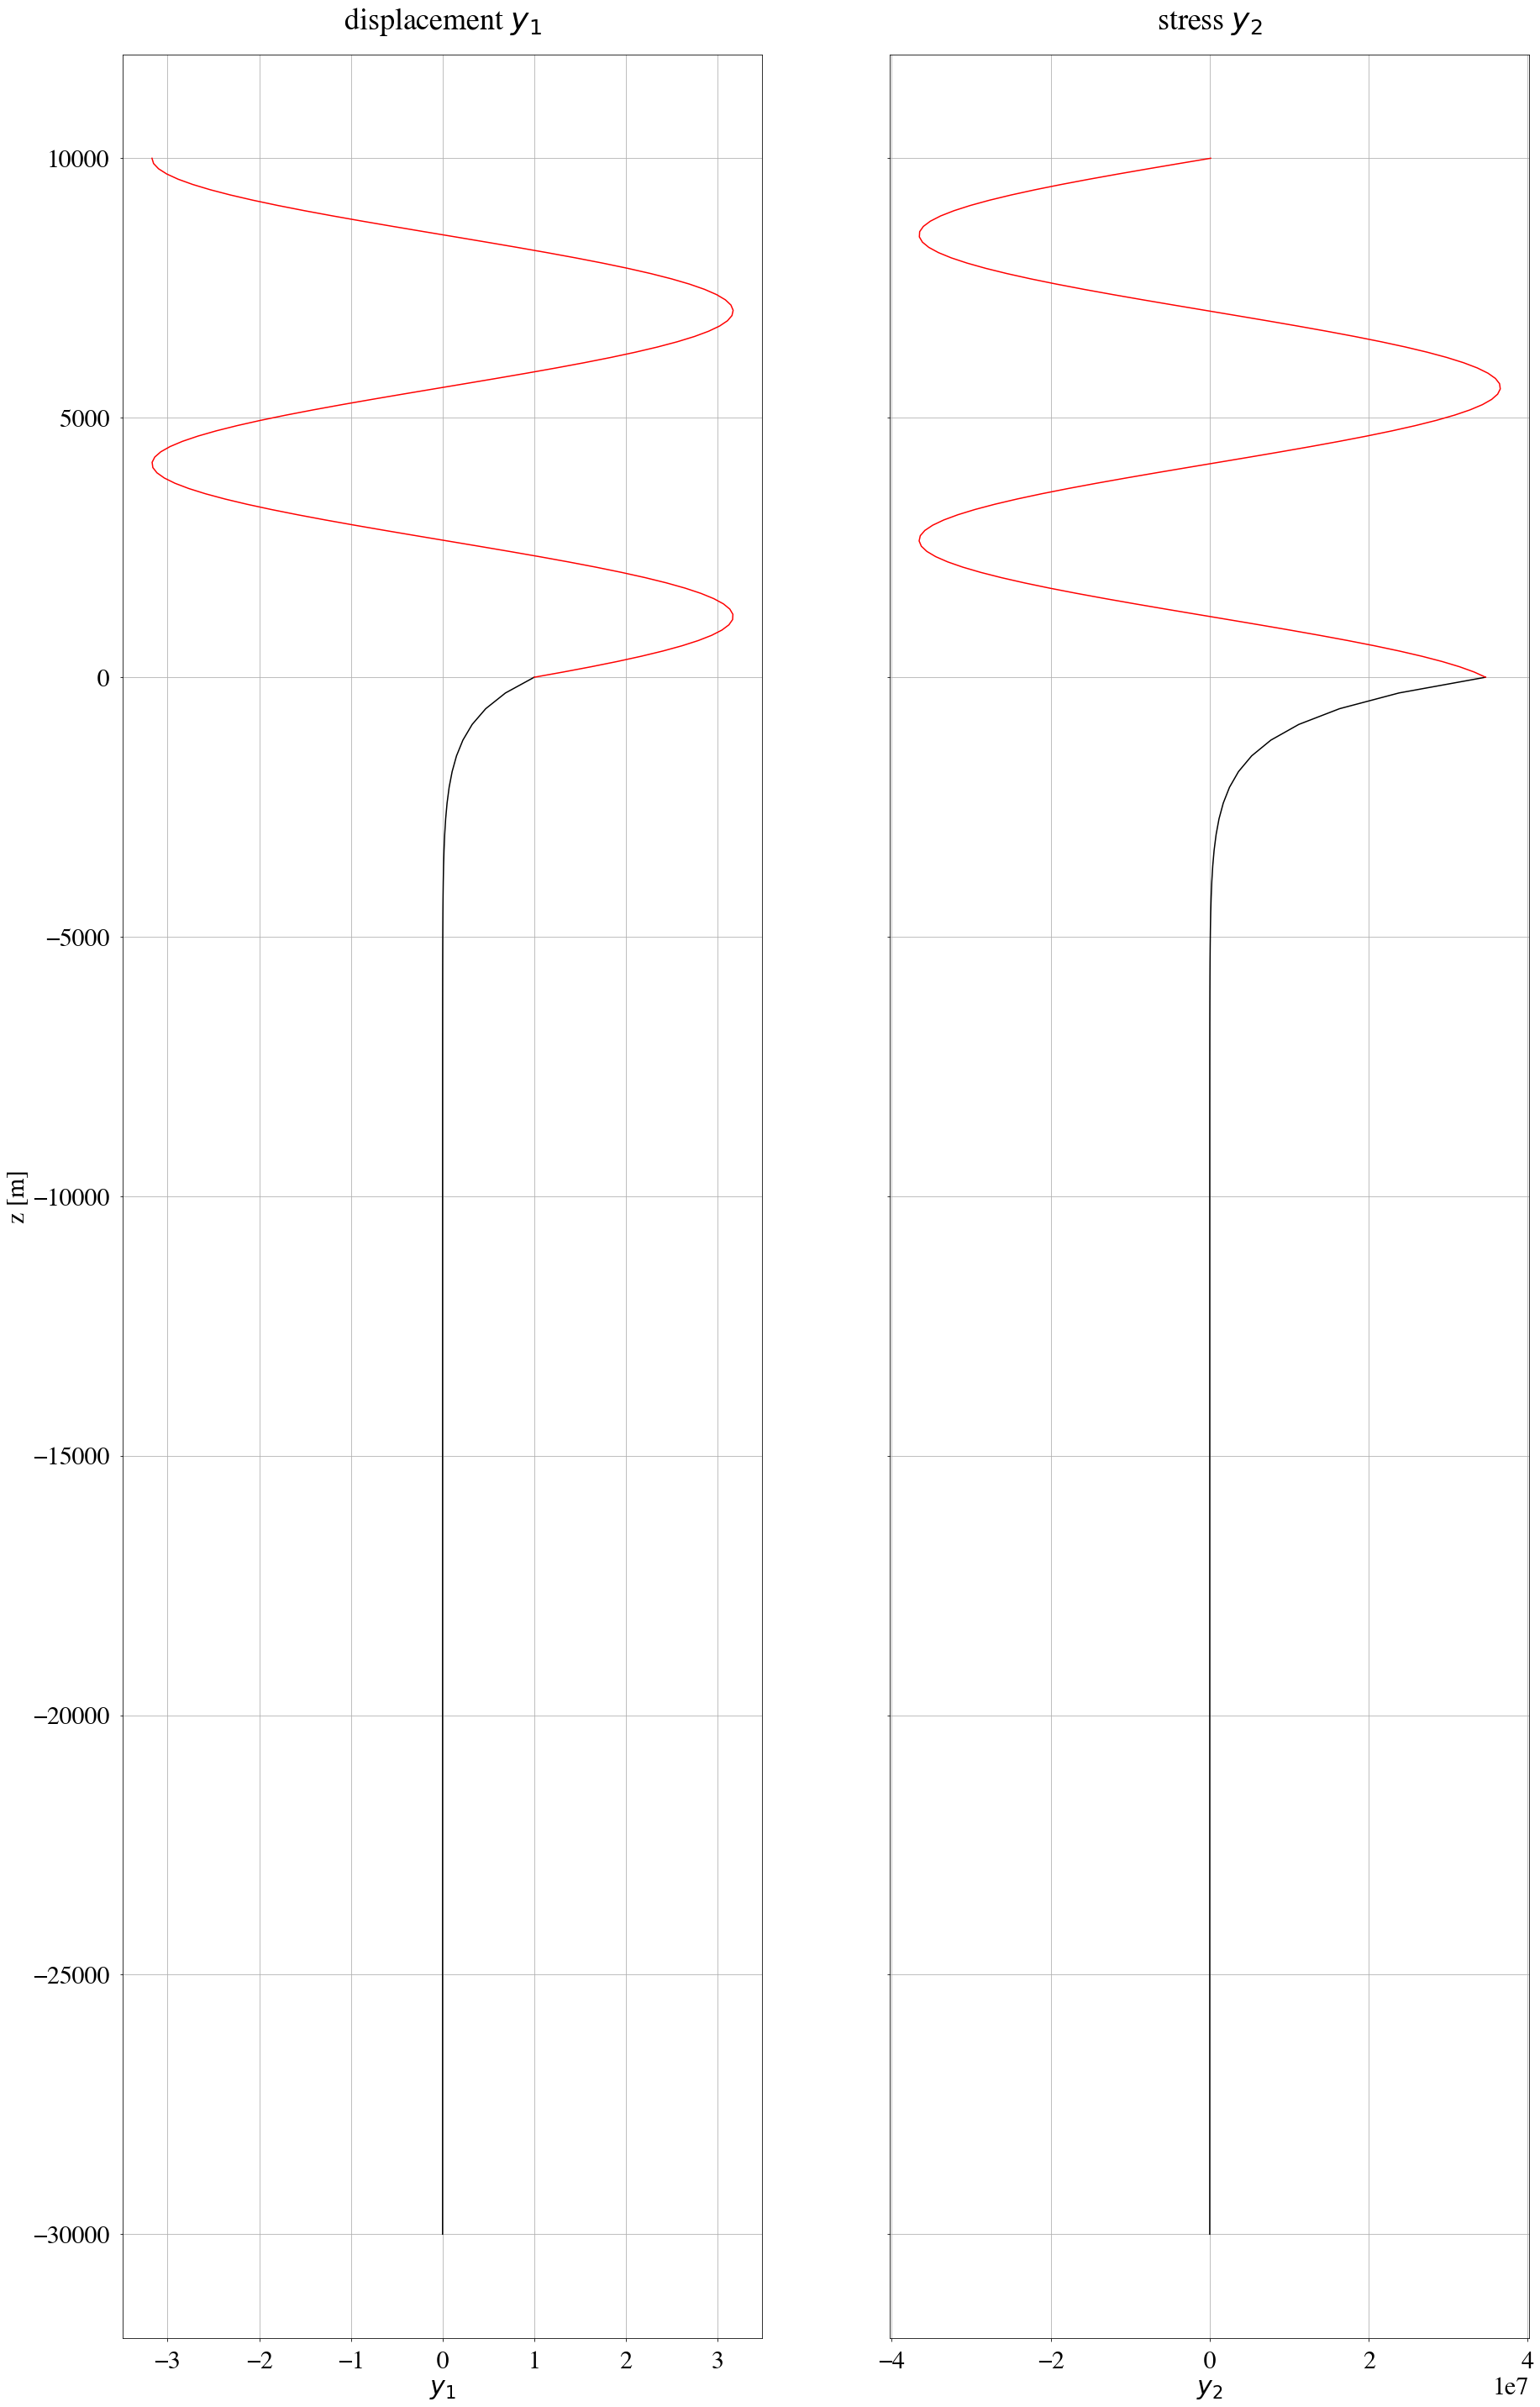

In [10]:
# compute nu_1 and nu_2
omega=2.0*np.pi*f[i]
k=omega/beta[i,j]
nu_1=np.sqrt(rho_1*omega**2/mu_1 - k**2)
nu_2=np.sqrt(k**2 - rho_2*omega**2/mu_2)

# plot lower half space
z=np.linspace(-3.0*H,0.0,100)
y_1=np.exp(nu_2*z)
y_2=mu_2*nu_2*np.exp(nu_2*z)

fig, (ax1, ax2) = plt.subplots(1,2,sharey='row',figsize=(30,50))
ax1.plot(y_1,z,'k')
ax2.plot(y_2,z,'k')

# plot layer
z=np.linspace(0.0,H,100)
y_1=np.cos(nu_1*z)+((mu_2*nu_2)/(mu_1*nu_1))*np.sin(nu_1*z)
y_2=-mu_1*nu_1*np.sin(nu_1*z)+mu_2*nu_2*np.cos(nu_1*z)

ax1.plot(y_1,z,'r')
ax1.grid()
ax1.set_title('displacement $y_1$',pad=30)
ax1.set(xlabel='$y_1$',ylabel='z [m]')

ax2.plot(y_2,z,'r')
ax2.grid()
ax2.set_title('stress $y_2$',pad=30)
ax2.set(xlabel='$y_2$')

plt.plot()

## 2.3. Numerical solution

While the equations of motion for Love waves can be solved semi-analytically in the special case of an isotropic layer over an isotropic half space, this is generally not the case for more complicated models. Hence, numerical approaches are needed.

The crux of the problem lies in the solution of the equations of motion such that the free-surface condition $y_2 = 0$ at $z=H$ is satisfied. A common approach, that we follow here, is to pick a frequency $\omega$ and some trial wave number $k$. The equations of motion are then integrated from the bottom towards the surface. If, for that specific $k$, the free-surface condition is satisfied reasonably well, we have found a reasonable $k$. Otherwise, another trial wave number $k$ is tested, and so on and so forth.

In principle, the integration needs to start at $z=-\infty$, which is obviously not possible in practice. A good compromise is to start the integration at a depth where $y_1$ and $y_2$ have already decayed substantially, for instance, a depth in km that is around 3 times the longest period in s. (So, for a period of 10 s, we would start integrating at 30 km depth.)

### 2.3.1. Phase and group velocities

To hide the complexity of numerical integration and eigenvalue search from this notebook, we implement them in a Python package that we import below. It includes the function dispersion_sh, which takes an input file as argument and then returns a set of frequencies with their corresponding phase and group velocities. Please have a careful look at least at the input file. It contains several numerical parameters, but also a reference to the Earth model used for the calculations.

The group velocity $U=d\omega/dk$ could be computed by numerical differentiation along a dispersion curve. Since this would be both numerically expensive and inaccurate, it has become common practice to take advantage of variational principles. An important role in this is played by the energy equation, which follows directly from the equations of motion:

\begin{equation}
\omega^2 I_1 = I_2\,,
\end{equation}

with

\begin{equation}
I_1 = \int_{-\infty}^H \rho y_1^2 \,dz\,,\qquad I_2 = \int_{-\infty}^H \left( \frac{1}{L} y_2^2 + k^2 N y_1^2  \right)\,.
\end{equation}

Realising that the energy equation also holds for perturbed solutions $y_i + \delta y_i$ and $k+\delta k$ at frequency $\omega + \delta\omega$, one can derive an exact expression for the group velocity,

\begin{equation}
U = \frac{k}{\omega} \frac{I_3}{I_1}\,,
\end{equation}

with the integral

\begin{equation}
I_3 = \int_{-\infty}^H N y_1^2 \, dz\,.
\end{equation}

In [11]:
import dispersion_sh as sh

frequencies,phase_velocities,group_velocities=sh.dispersion_sh('INPUT/input.xml')

f=0.050 Hz, c=2602.435 m/s, U=2041.875 m/s
f=0.060 Hz, c=2474.986 m/s, U=1942.888 m/s
f=0.070 Hz, c=2375.694 m/s, U=1894.346 m/s
f=0.080 Hz, c=2300.786 m/s, U=1879.455 m/s
f=0.090 Hz, c=2244.767 m/s, U=1880.364 m/s
f=0.100 Hz, c=2202.501 m/s, U=1887.583 m/s
f=0.110 Hz, c=2170.099 m/s, U=1896.816 m/s
f=0.120 Hz, c=2144.821 m/s, U=1906.224 m/s
f=0.130 Hz, c=2124.765 m/s, U=1915.063 m/s
f=0.140 Hz, c=2108.602 m/s, U=1923.079 m/s
f=0.150 Hz, c=2095.393 m/s, U=1930.228 m/s
f=0.150 Hz, c=2970.215 m/s, U=2424.814 m/s
f=0.160 Hz, c=2084.463 m/s, U=1936.559 m/s
f=0.160 Hz, c=2918.755 m/s, U=2211.348 m/s
f=0.170 Hz, c=2075.317 m/s, U=1942.151 m/s
f=0.170 Hz, c=2854.529 m/s, U=2023.634 m/s
f=0.180 Hz, c=2067.586 m/s, U=1947.090 m/s
f=0.180 Hz, c=2782.918 m/s, U=1891.576 m/s
f=0.190 Hz, c=2060.993 m/s, U=1951.461 m/s
f=0.190 Hz, c=2710.449 m/s, U=1810.318 m/s
f=0.200 Hz, c=2055.324 m/s, U=1955.337 m/s
f=0.200 Hz, c=2641.815 m/s, U=1765.485 m/s
f=0.210 Hz, c=2050.414 m/s, U=1958.786 m/s
f=0.210 Hz,

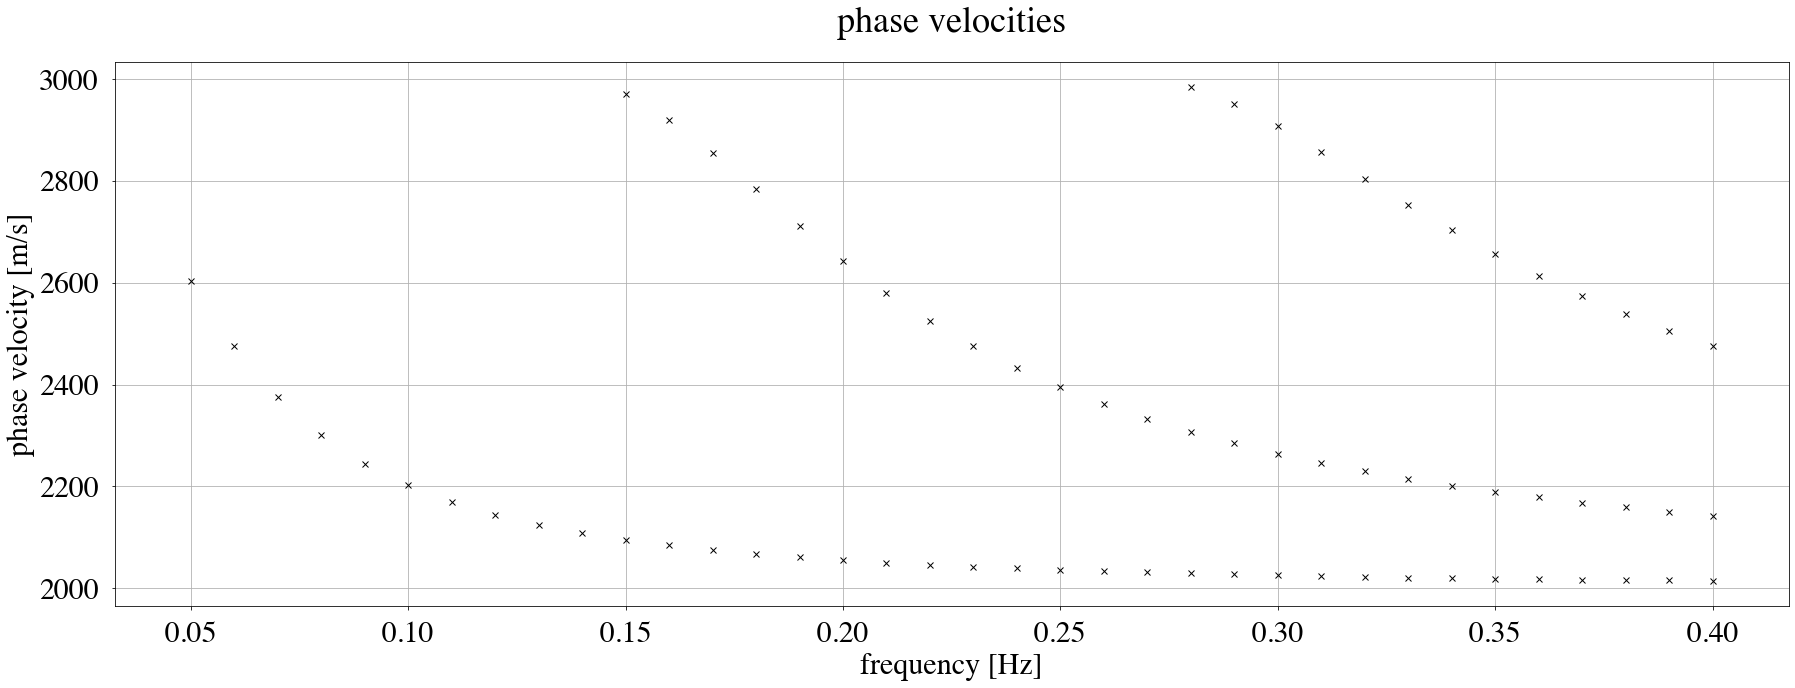

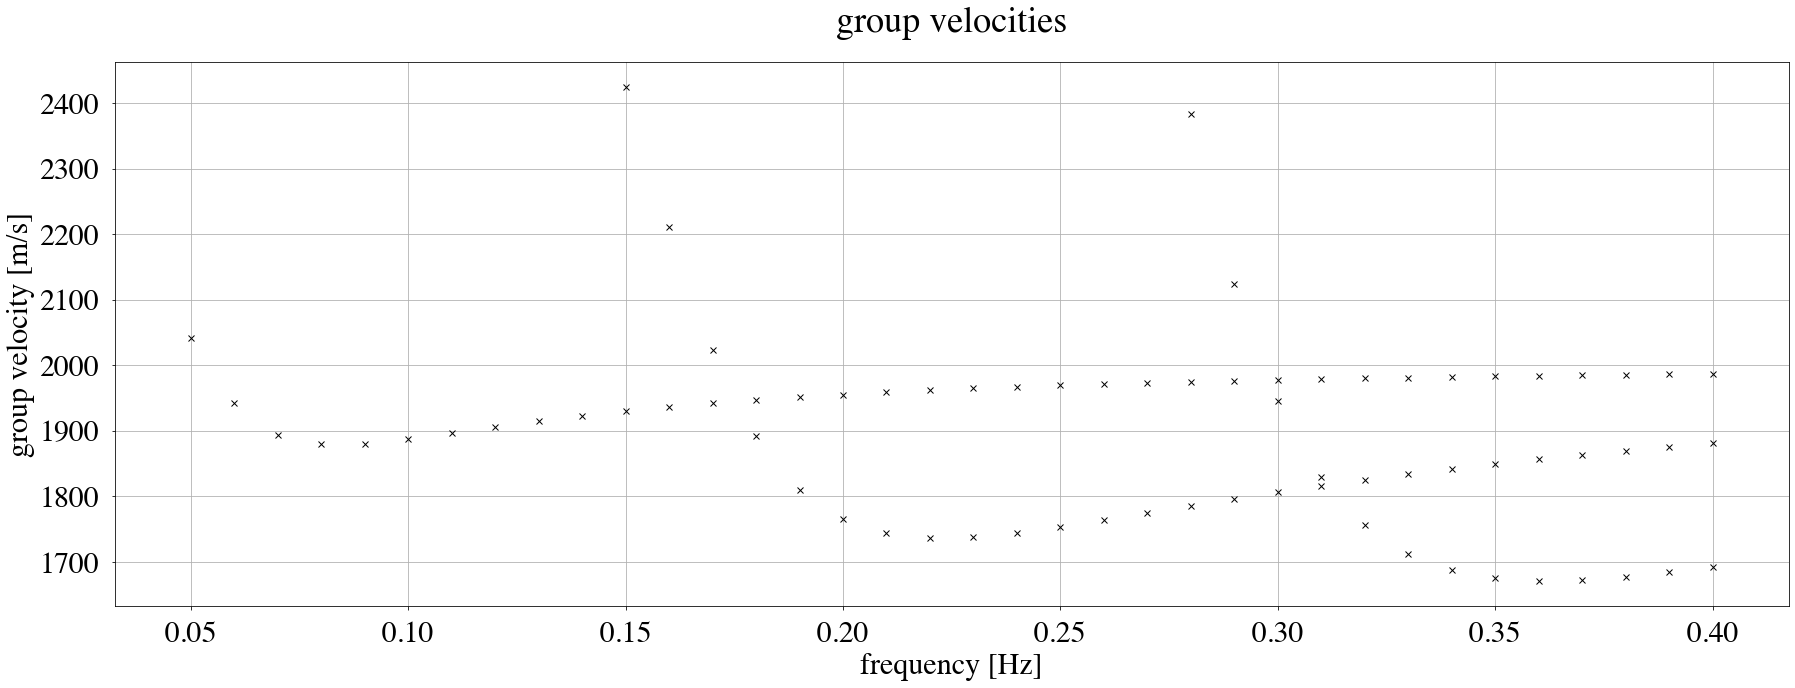

In [12]:
# plot phase velocities
plt.subplots(1,figsize=(30,10))
for i in range(len(frequencies)):
    plt.plot(frequencies[i],phase_velocities[i],'kx')
    
plt.xlabel('frequency [Hz]')
plt.ylabel('phase velocity [m/s]')
plt.title('phase velocities',pad=30)
plt.grid()
plt.show()

# plot group velocities
plt.subplots(1,figsize=(30,10))
for i in range(len(frequencies)):
    plt.plot(frequencies[i],group_velocities[i],'kx')
    
plt.xlabel('frequency [Hz]')
plt.ylabel('group velocity [m/s]')
plt.title('group velocities',pad=30)
plt.grid()
plt.show()

### 2.3.2. Displacement and stress functions

The displacement function $y_1(z)$ and the stress function $y_2(z)$ are byproducts of the numerical integration. The function dispersion_sh writes these functions as files into an output directory, specified in the input file. In the following, we read such displacement and stress functions and plot them.

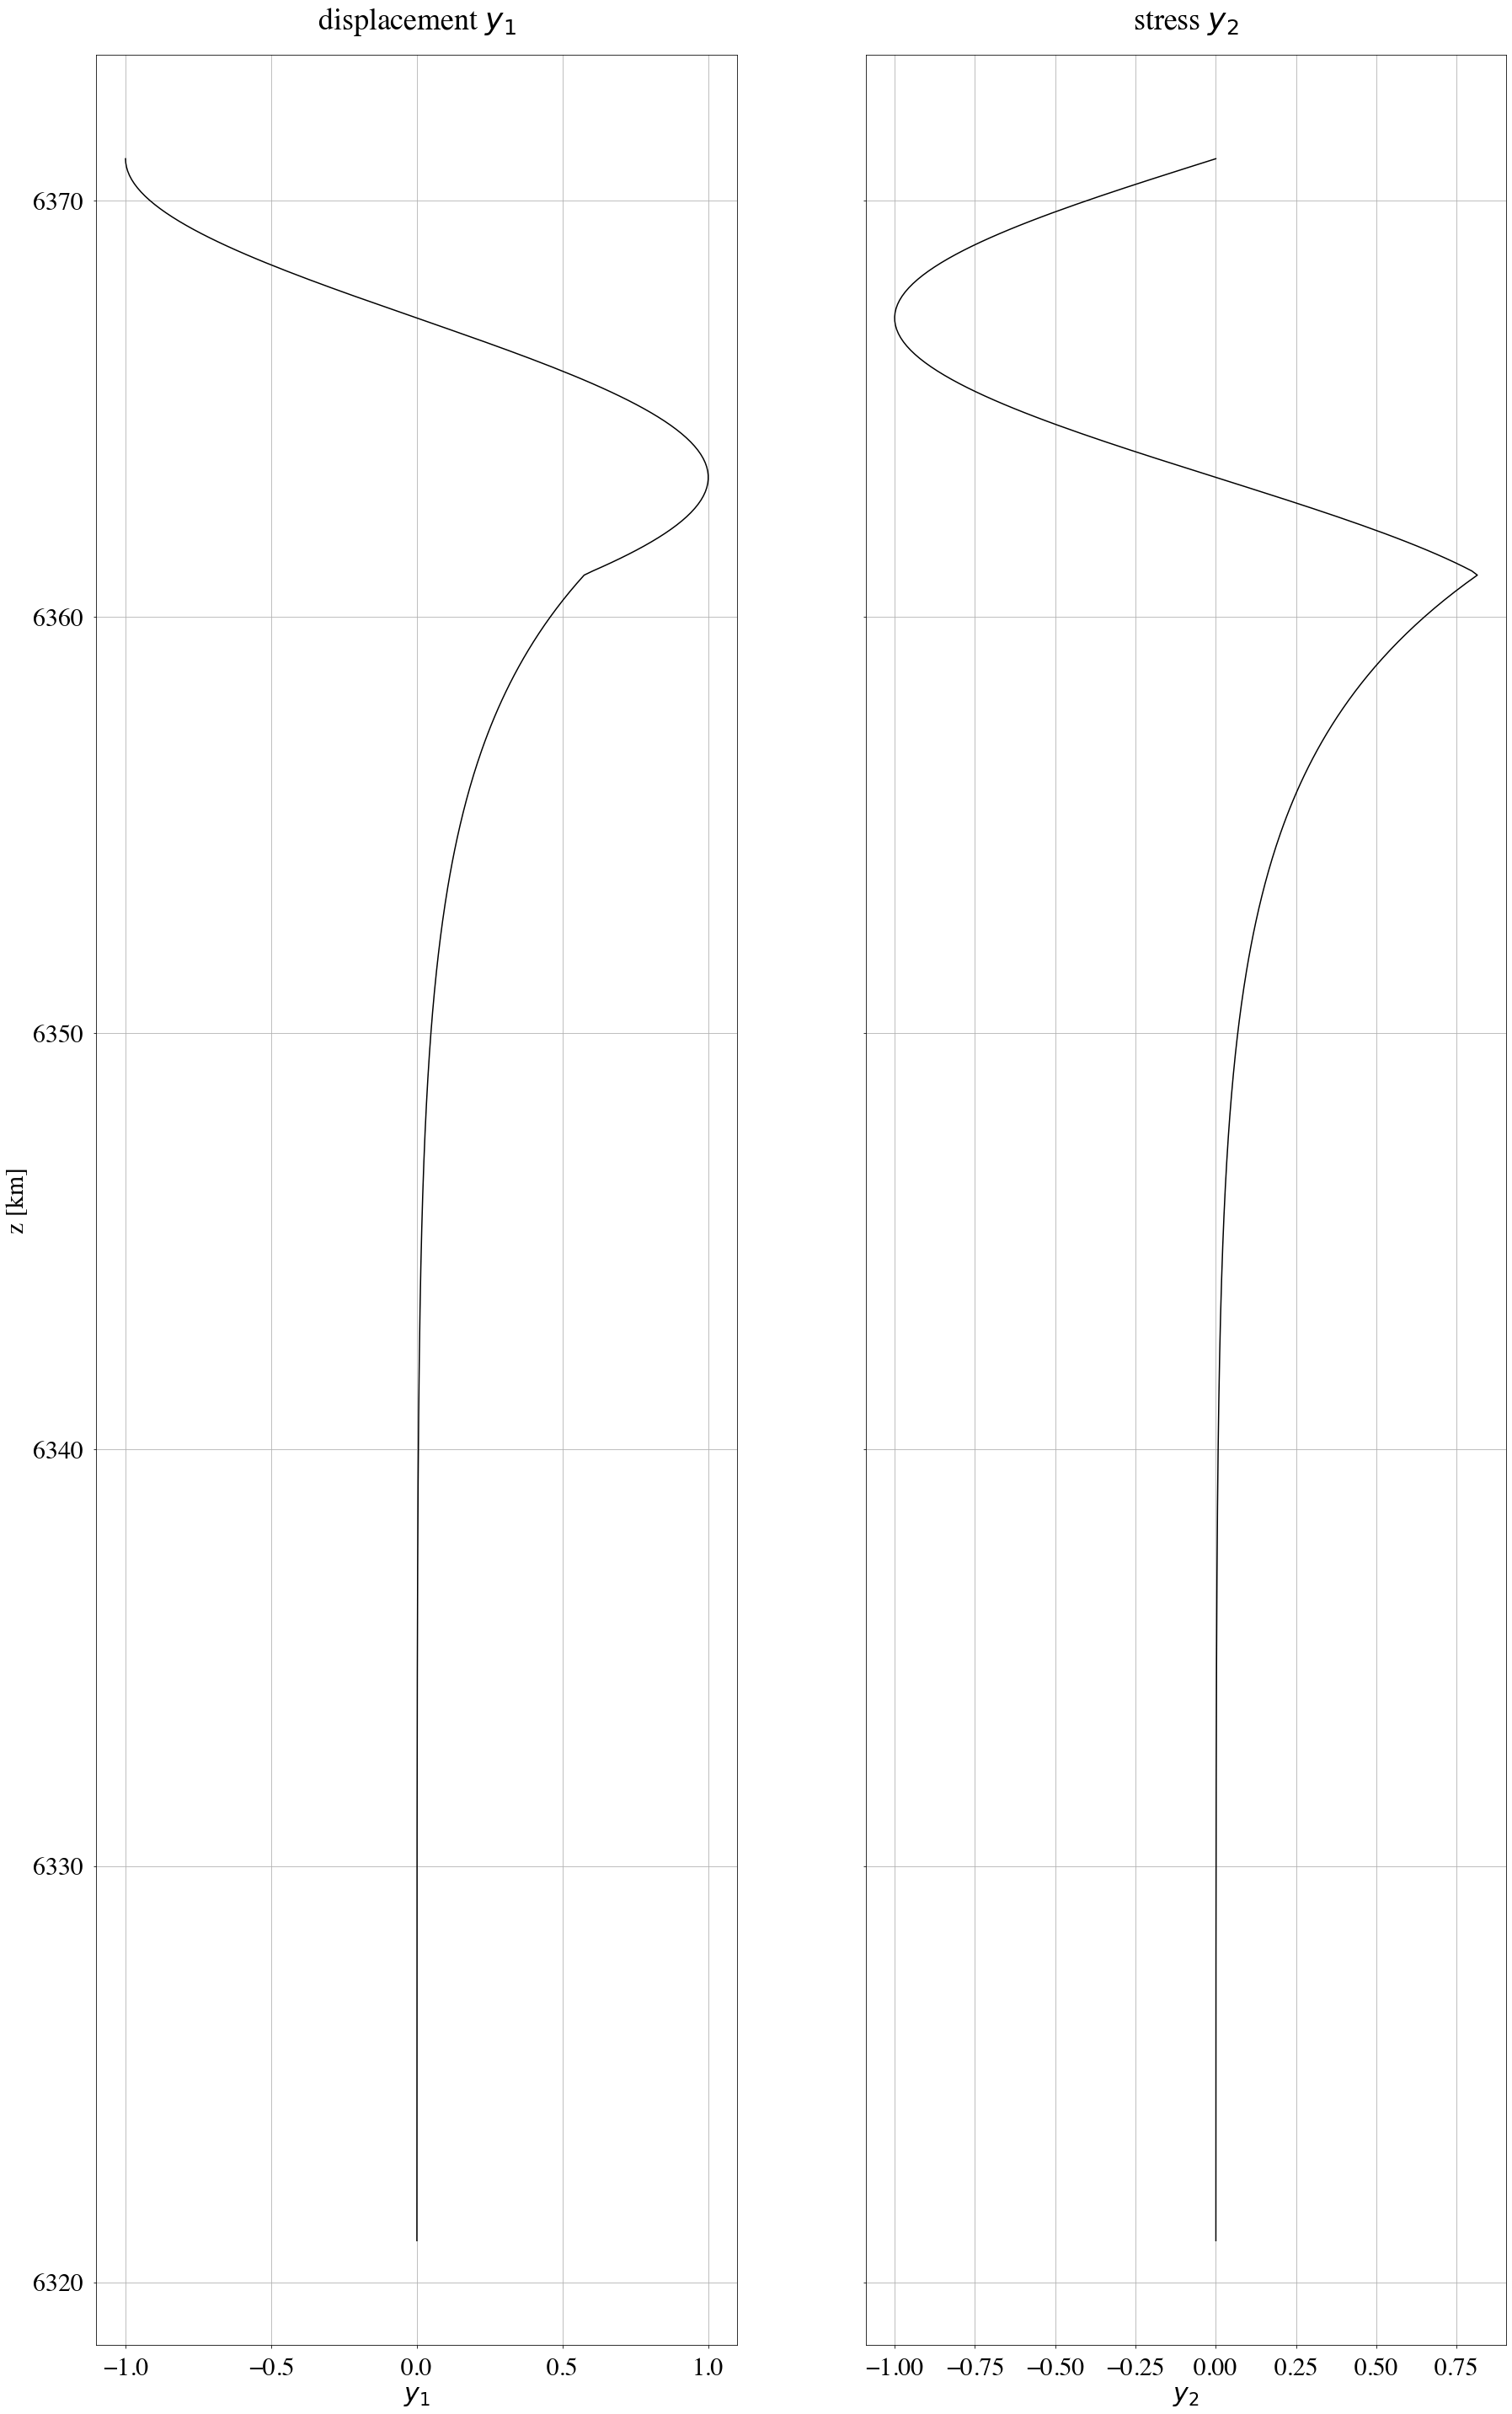

In [19]:
import plot_displacement_sh as pdsh

pdsh.plot_displacement_sh('OUTPUT/displacement_sh.onelayer.f=0.200.c=2641.815')

# 3. Sensitivity kernels

The energy equation also allows us to consider variations of the solution $\delta y_i$ and $\delta c$ (for a fixed $\omega$) induced by variations $\delta\rho$, $\delta L$ and $\delta N$ of the medium properties. In a condensed form, the fractional phase velocity variations can be expressed in terms of fractional medium perturbations as follows,

\begin{equation}
\frac{\delta c}{c} = \int_{-\infty}^H \frac{\delta \rho}{\rho} K_\rho^0 \,dz + \int_{-\infty}^H \frac{\delta L}{L} K_L \,dz + \int_{-\infty}^H \frac{\delta N}{N} K_N \,dz\,.
\end{equation}

The integral (or sensitivity) kernels are given by

\begin{equation}
K_\rho^0 = \frac{1}{2I_1} \frac{c}{U} \rho y_1^2\,,\quad K_L=-\frac{1}{2\omega^2 I_1} \frac{c}{U} \frac{1}{L} y_2^2\,,\quad K_N = -\frac{1}{2\omega^2 I_1} \frac{c}{U} k^2 N y_1^2\,.
\end{equation}

In practice, it is more convenient to change the parameterisation from $(\rho, L, N)$ to $(\rho, \beta_v, \beta_h)$, where the SV- and SH-velocities are defined as

\begin{equation}
\beta_v = \sqrt{\frac{L}{\rho}}\,,\quad \beta_h = \sqrt{\frac{N}{\rho}}\,.
\end{equation}

For the fractional variation of the phase velocity we then find

\begin{equation}
\frac{\delta c}{c} = \int_{-\infty}^H \frac{\delta \rho}{\rho} K_\rho \,dz + \int_{-\infty}^H \frac{\delta \beta_v}{\beta_v} K_{\beta_v} \,dz + \int_{-\infty}^H \frac{\delta \beta_h}{\beta_h} K_{\beta_h} \,dz\,,
\end{equation}

with 

\begin{equation}
K_\rho = K_\rho^2 + K_L + K_N\,,\quad K_{\beta_v} = 2 K_L\,,\quad K_{\beta_h} = 2 K_N\,.
\end{equation}

The sensitivity kernels are computed on-the-fly during the solution of the above eigenvalue problem and written into the output directory. Below, we read and visualise one of these kernel files.

**Note 1**: Takeuchi & Saito (1972) obtain kernel expressions by varying the energy equation with respect to $\omega$, keeping $k$ constant. However, to obtain $\delta c/c = -\delta k/k$, it is in fact easier to vary $k$, keeping $\omega$ constant.

**Note 2**: It would, of course, also be possible to choose a parameterisation in terms of $\beta_v$, $\beta_h$, $\alpha_v$, $\alpha_h$ and $\eta$. This would make sense in a joint inversion of Love and Rayleigh wave dispersion. However, it also makes the kernels expressions more complicated.

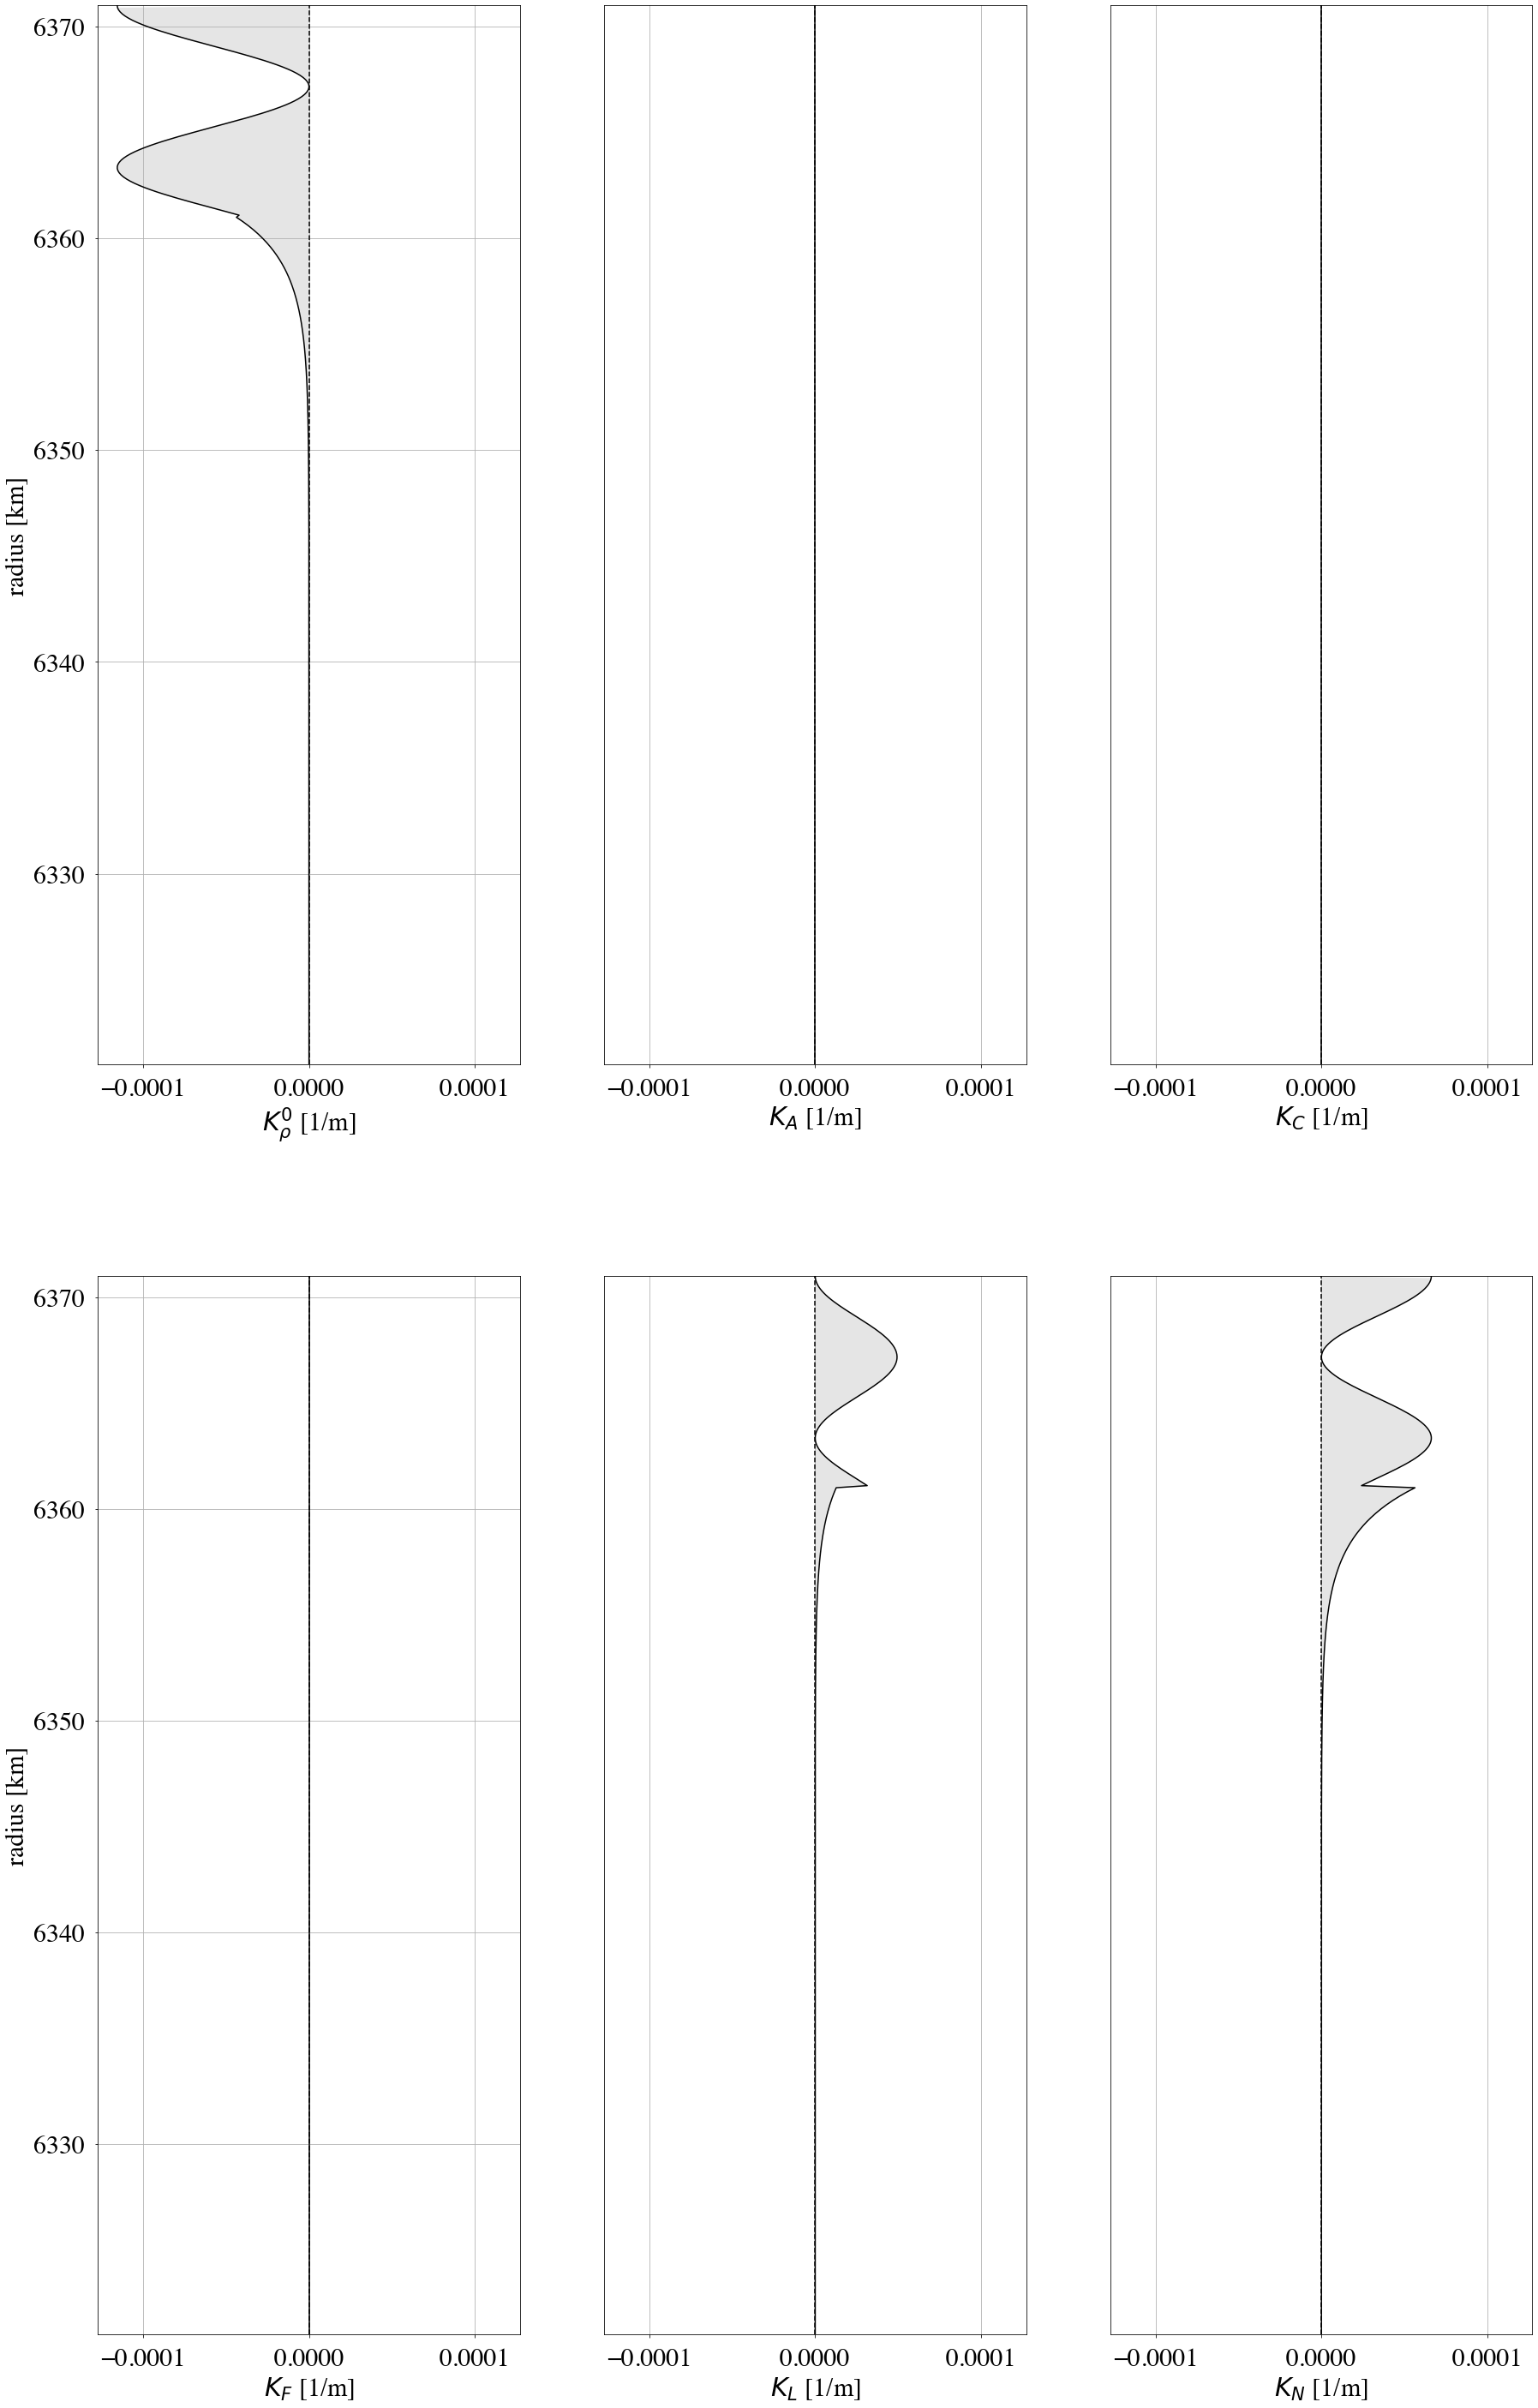

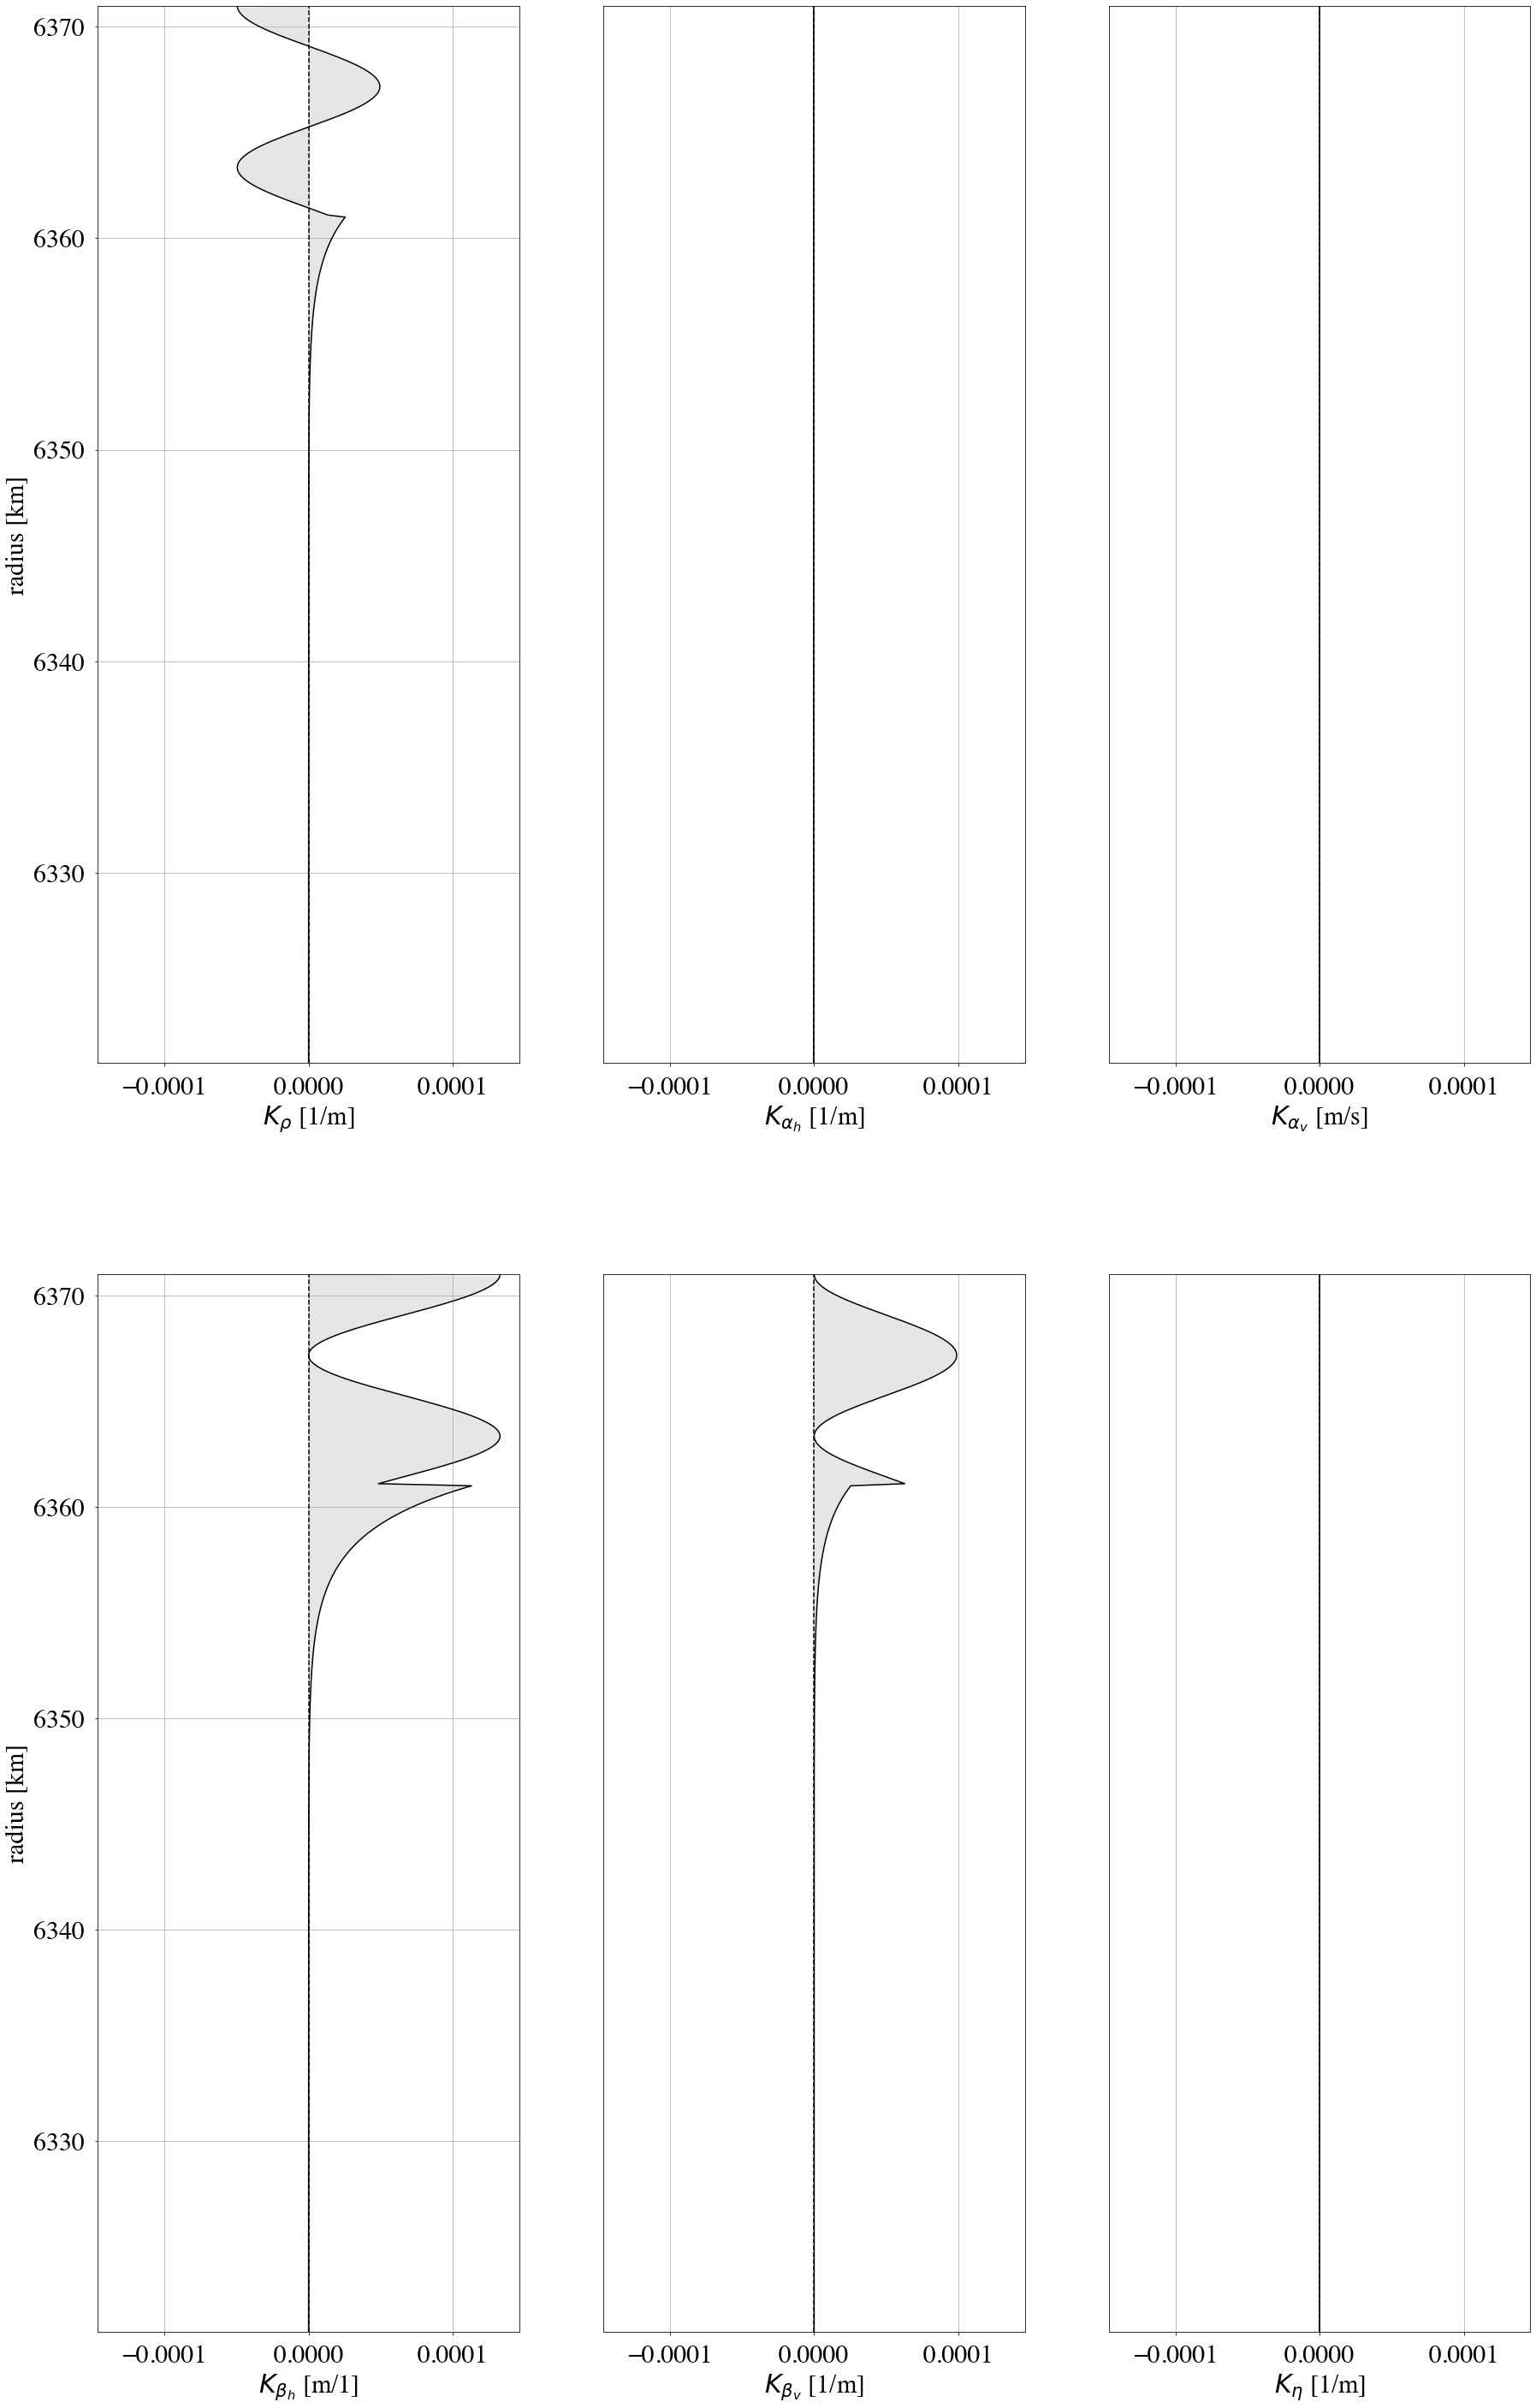

In [18]:
import plot_kernels as pk
reload(pk)

pk.plot_kernels('OUTPUT/kernels_sh.onelayer.f=0.200.c=2641.815')